In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
diabetes = pd.read_csv('C:/Users/jycha/Downloads/diabetes.csv')

In [3]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Splitting the data into training and test test
X = diabetes.iloc[:,0:8].values
y = diabetes.iloc[:,8].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [8]:
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [11]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(100,input_shape=(8,),activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               900       
                                                                 
 dense_5 (Dense)             (None, 80)                8080      
                                                                 
 dense_6 (Dense)             (None, 60)                4860      
                                                                 
 dense_7 (Dense)             (None, 2)                 122       
                                                                 
Total params: 13,962
Trainable params: 13,962
Non-trainable params: 0
_________________________________________________________________


In [12]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
20/20 [==============================] - 1s 21ms/step - loss: 9.7843 - accuracy: 0.5179 - val_loss: 0.6904 - val_accuracy: 0.5065
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6846 - accuracy: 0.6368 - val_loss: 0.6166 - val_accuracy: 0.7143
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6378 - accuracy: 0.6482 - val_loss: 0.5917 - val_accuracy: 0.6818
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6102 - accuracy: 0.6759 - val_loss: 0.7586 - val_accuracy: 0.3961
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6354 - accuracy: 0.6417 - val_loss: 0.6332 - val_accuracy: 0.6558
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6108 - accuracy: 0.6612 - val_loss: 0.5418 - val_accuracy: 0.7273
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.6808 - val_loss: 0.5737 - val_accuracy: 0.7468
Epoch 8/100


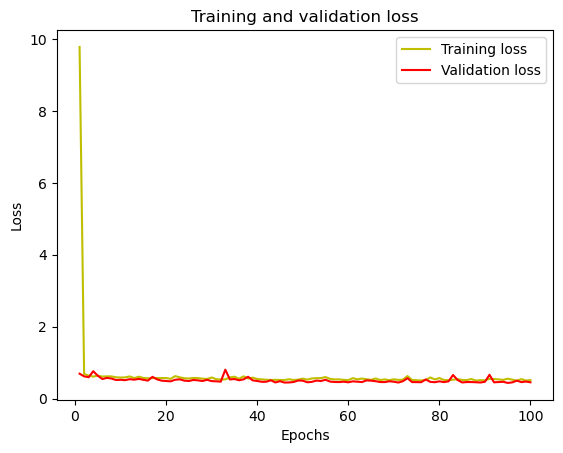

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

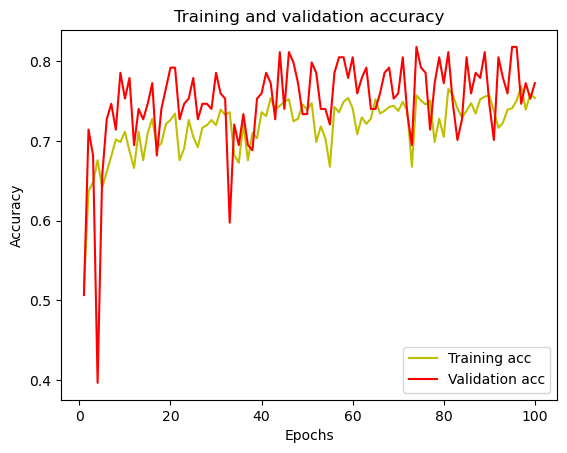

In [14]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.64      0.60      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154

[[91 16]
 [19 28]]
